<a href="https://colab.research.google.com/github/Amol1410/TwitterSentimentAnalysis/blob/main/Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing the libraries**

In [12]:
import tweepy
from textblob import TextBlob
import matplotlib.pyplot as plt

import re
import string
import numpy as np

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

## **Connecting the Twitter API**

In [2]:
# to connect as OAth handler or jump serever / revers proxy server
consumer_key = "enter_key"
consumer_secret = "enter_secret"

# from proxy server we need to connect
access_token = "enter_yours"
access_token_secret = "enter_yours"

In [3]:
# To connect jump server of twitter
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)

# To connect from jump server to web server of twitter
auth.set_access_token(access_token,access_token_secret)

# To connect to API storge server of twitter
api_connect = tweepy.API(auth)

## **Collecting the Tweets**

In [13]:
# Enter the Keyword and no. of tweets
keyword = input("Enter Keyword : ")
noOfterms = input("How many tweets : ")

Enter Keyword : biden
How many tweets : 200


In [14]:
tweets = api_connect.search(keyword, count=noOfterms)

In [15]:
for tweet in tweets:
  print(tweet.text)
#tweets.text

RT @bocxtop: if joe biden not gonna remove student loans or give us healthcare he needs to stop the sun from going down before 6pm
Biden Administration = The definition of corruption https://t.co/QGu12lqL6X
RT @StephenMoore: Tax increases in Joe Biden's Build Back Better plan will destroy nearly 5 million jobs.

Pass it on.
RT @chipfranklin: If you support President Biden and want his ENTIRE agenda to pass, retweet this and follow my friends at @CalltoActivism.…
@CaptRogerVictor @VP Will this be yet another administration that flies in older, thirstier, aircraft while sitting… https://t.co/NVEAcphq9c
RT @Jim_Jordan: Secretary Mayorkas and Vice President Harris ignored the border crisis. 

Secretary Buttigieg disappeared during the supply…
RT @costareports: Important to remember what prompted the subpoena — scenes in PERIL showing Bannon and Trump speaking about the 6th, think…
RT @donwinslow: EXPLOSIVE NEW VIDEO! #JoeManchinSenatorForSale

@Sen_JoeManchin is blocking Joe Biden's agenda

## **Preprocessing the Tweets**

In [16]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
for tweet in tweets:
  #to lowercase
  tweet = str(tweet.text).lower()

  # Removing URL
  tweet = re.sub(r"https\S+|www\S+|https\S+", "", tweet, flags=re.MULTILINE)

  # Removing punctuations
  tweet = tweet.translate(str.maketrans("", "", string.punctuation))

  # Removing special characters
  tweet = re.sub(r'\@\w+|#', "", tweet)
  
  # Tokenization
  tweet_tokens = word_tokenize(tweet)
  filter_words = [word for word in tweet_tokens if word not in stop_words]

  # Stemming
  ps = PorterStemmer()
  stem_words = [ps.stem(w) for w in tweet_tokens]

  # Lemmatizing
  lemmatizer = WordNetLemmatizer()
  lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stem_words]

  tweet = " ".join(lemma_words)
  print(tweet)

rt bocxtop if joe biden not gon na remov student loan or give us healthcar he need to stop the sun from go down befor 6pm
biden administr the definit of corrupt
rt stephenmoor tax increas in joe biden build back good plan will destroy nearli 5 million job pass it on
rt chipfranklin if you support presid biden and want hi entir agenda to pass retweet thi and follow my friend at calltoactivism…
captrogervictor vp will thi be yet anoth administr that fli in old thirsty aircraft while sitting…
rt jimjordan secretari mayorka and vice presid harri ignor the border crisi secretari buttigieg disappear dure the supply…
rt costareport import to rememb what prompt the subpoena — scene in peril show bannon and trump speak about the 6th think…
rt donwinslow explos new video joemanchinsenatorforsal senjoemanchin is block joe biden agenda we found so much vile and…
rt ziyaoni joe biden ’ s twofront war for democraci
rt chellaney in just two month sinc biden surrend of afghanistan to terrorist india s

## **Plotting Pie Chart and Bar Graph**

Positive tweets:  34
Negative tweets:  18
 Neutral tweets:  45


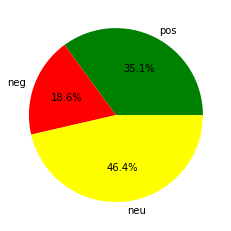

In [18]:
# Calculating no. of positive, negative and neutral tweets
pos=0
neg=0
neu=0

for tweet in tweets:
  #here it will apply NLP
  analysis = TextBlob(tweet.text)

  if analysis.sentiment.polarity > 0:
     pos=pos+1
  elif analysis.sentiment.polarity == 0 :
     neu=neu+1
  else :
     neg=neg+1
print("Positive tweets: ",pos)  
print("Negative tweets: ",neg)  
print(" Neutral tweets: ",neu)  

# ploting piechart
plt.pie([pos,neg,neu],labels=['pos','neg','neu'],autopct="%1.1f%%",colors=['green','red','yellow'])
plt.show()

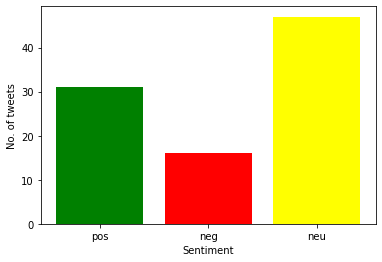

In [11]:
# ploting Bargraph
x = np.array(['pos','neg','neu'])
y = np.array([pos,neg,neu])

colors=['green','red','yellow']
plt.bar(x, y, color = colors)

plt.xlabel("Sentiment")
plt.ylabel("No. of tweets")
plt.show()